In [1]:
###############
### Imports ###
###############

import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [2]:
from functions import *

(<matplotlib.image.AxesImage at 0x1eb0b06f400>,
 <matplotlib.image.AxesImage at 0x1eb0b06f580>)

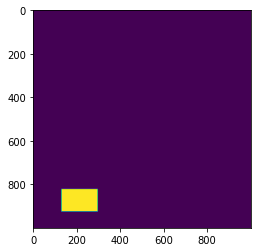

In [3]:
size = 1000
shape_tri, base_tri, height_tri, start_point_tri = generate_triangle(size)
shape_sq, base_sq, height_sq, start_point_sq = generate_square(size)
plt.imshow(shape_tri), plt.imshow(shape_sq)

In [4]:
amount = 100
size = 1000
weights = np.zeros((size,size))
squares = []
triangles = []
square_areas = []
triangle_areas = []
training = []

while len(training) < 2*amount:
    shape_tri, base_tri, height_tri, start_point_tri = generate_triangle(size)
    shape_sq, base_sq, height_sq, start_point_sq = generate_square(size)
    if np.sum(shape_tri)/np.sum(shape_sq) > 0.9 and np.sum(shape_tri)/np.sum(shape_sq) < 1.1:
        training.append((shape_sq,0))
        training.append((shape_tri,1))
        square_areas.append(np.sum(shape_sq))
        triangle_areas.append(np.sum(shape_tri))
        amount += 1

print(f'Average square area: {np.mean(square_areas)}, Average triangle area: {np.mean(triangle_areas)}')

KeyboardInterrupt: 

In [196]:

    # plt.imshow(weights)
    # plt.title(f'{len(training),i}')
    # plt.colorbar()
    # plt.show()


KeyboardInterrupt: 